In [9]:
# importing necessary packages

import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline  ...  new update makes this obsolete
import numpy as np
import datetime as dt
import statistics

In [10]:
# reading in .csv file
df = pd.read_csv("Global_Weather_Madrid.csv")

# add underscore in column header name
df.rename(columns = {'Avg humidity_percent':'Avg_humidity_percent'}, inplace = True)

# add column that reformats the day, month, and year columns to 1 contiguously growing date field
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')

In [11]:
df.dtypes

Year                                      int64
Month                                     int64
Day                                       int64
Avg Temp_C                              float64
Max temp_C                              float64
Min temp_C                              float64
Avg atm                                  object
Avg station atm                          object
Avg_humidity_percent                     object
Sum rain_snowmelt_mm                     object
Avg vis_km                              float64
Avg wind speed_km/h                     float64
Max sustained wind speed_km/h            object
Max wind speed_km/h                      object
Fog                                       int64
Rain or Drizzle                           int64
Snow or Ice                               int64
Hail                                      int64
Thunder                                   int64
Rotation                                  int64
Date                             datetim

In [12]:
df2 = df
df2.dtypes
#df2['Sum rain_snowmelt_mm'] = df2['Sum rain_snowmelt_mm'].str.replace('-', '')
#df2['Avg atm'] = df2['Avg atm'].str.replace('-', '')
df2.head(5)

,Year,Month,Day,Avg Temp_C,Max temp_C,Min temp_C,Avg atm,Avg station atm,Avg_humidity_percent,Sum rain_snowmelt_mm,...,Avg wind speed_km/h,Max sustained wind speed_km/h,Max wind speed_km/h,Fog,Rain or Drizzle,Snow or Ice,Hail,Thunder,Rotation,Date
0,1991,1,1,5.3,9.6,0.0,-,-,86,0,...,2.4,13,-,1,0,0,0,0,0,1991-01-01
1,1991,1,2,2.6,6.4,0.0,-,-,88,0,...,4.1,11.1,-,1,0,0,0,0,0,1991-01-02
2,1991,1,3,2.3,5.2,-1.0,-,-,87,0,...,2.0,9.4,-,1,0,0,0,0,0,1991-01-03
3,1991,1,4,3.9,10.0,0.0,-,-,63,0,...,4.4,25.9,-,1,0,0,0,0,0,1991-01-04
4,1991,1,5,2.9,10.4,-3.0,-,-,69,0,...,5.2,18.3,-,0,0,0,0,0,0,1991-01-05


In [13]:
#Changing column data types from objects(strings) to floats to make them plottable

df2['Avg atm'] = pd.to_numeric(df['Avg atm'], errors = 'coerce')
df2['Avg atm'] = df['Avg atm'].astype(float)

df2['Avg_humidity_percent'] = pd.to_numeric(df['Avg_humidity_percent'], errors = 'coerce')
df2['Avg_humidity_percent'] = df['Avg_humidity_percent'].astype(float)

df2['Sum rain_snowmelt_mm'] = pd.to_numeric(df['Sum rain_snowmelt_mm'], errors = 'coerce')
df2['Sum rain_snowmelt_mm'] = df['Sum rain_snowmelt_mm'].astype(float)

df2['Avg station atm'] = pd.to_numeric(df['Avg station atm'], errors = 'coerce')
df2['Avg station atm'] = df['Avg station atm'].astype(float)

df2.dtypes

Year                                      int64
Month                                     int64
Day                                       int64
Avg Temp_C                              float64
Max temp_C                              float64
Min temp_C                              float64
Avg atm                                 float64
Avg station atm                         float64
Avg_humidity_percent                    float64
Sum rain_snowmelt_mm                    float64
Avg vis_km                              float64
Avg wind speed_km/h                     float64
Max sustained wind speed_km/h            object
Max wind speed_km/h                      object
Fog                                       int64
Rain or Drizzle                           int64
Snow or Ice                               int64
Hail                                      int64
Thunder                                   int64
Rotation                                  int64
Date                             datetim

In [14]:
df2.head()

,Year,Month,Day,Avg Temp_C,Max temp_C,Min temp_C,Avg atm,Avg station atm,Avg_humidity_percent,Sum rain_snowmelt_mm,...,Avg wind speed_km/h,Max sustained wind speed_km/h,Max wind speed_km/h,Fog,Rain or Drizzle,Snow or Ice,Hail,Thunder,Rotation,Date
0,1991,1,1,5.3,9.6,0.0,NaN,NaN,86.0,0.0,...,2.4,13,-,1,0,0,0,0,0,1991-01-01
1,1991,1,2,2.6,6.4,0.0,NaN,NaN,88.0,0.0,...,4.1,11.1,-,1,0,0,0,0,0,1991-01-02
2,1991,1,3,2.3,5.2,-1.0,NaN,NaN,87.0,0.0,...,2.0,9.4,-,1,0,0,0,0,0,1991-01-03
3,1991,1,4,3.9,10.0,0.0,NaN,NaN,63.0,0.0,...,4.4,25.9,-,1,0,0,0,0,0,1991-01-04
4,1991,1,5,2.9,10.4,-3.0,NaN,NaN,69.0,0.0,...,5.2,18.3,-,0,0,0,0,0,0,1991-01-05


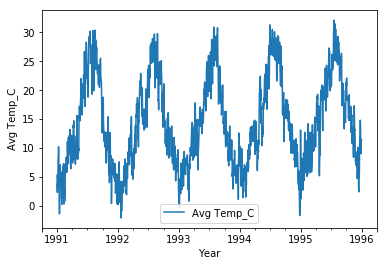

In [25]:
df2.plot(x = 'Date', y = 'Avg Temp_C')

# Label axis
plt.xlabel('Year')
plt.ylabel('Avg Temp_C')

plt.show()

# This line graph of average temperate vs time clearly displays the annual cyclicity of temperatures. 
# On a broader scale than annual cyclicity, one could argue the general trend of peak summer and winter tend to increase 
# gradually from 1992 - 1996.

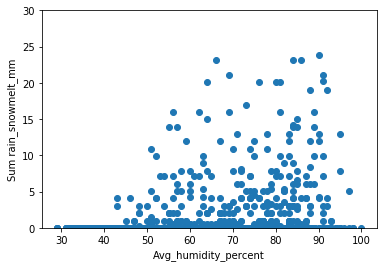

In [21]:
plt.scatter(x = df2['Avg_humidity_percent'], y = df2['Sum rain_snowmelt_mm'])

# Limit y axis range to better display data
plt.ylim((0,30))

# Label axis
plt.xlabel('Avg_humidity_percent')
plt.ylabel('Sum rain_snowmelt_mm')
plt.show()

# This scatter plot represents the humidity percentage at measurements of rain or snowmelt. 
# Without context of date, this plot doesn't provide much context and I would recommend coloring the plot based on months
# to determine if any trends are defined. 

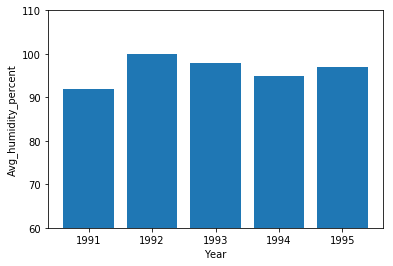

In [22]:
df2.groupby('Year')['Avg_humidity_percent']
height = df2['Avg_humidity_percent']
bars = df2['Year']
#y_pos = np.arange(len(bars))

plt.bar(bars, height)
plt.ylim((60, 110))

# Label axis
plt.xlabel('Year')
plt.ylabel('Avg_humidity_percent')

plt.show()

# This is a plot that demonstrates average humidity over time.
# Like the scatter plot, this doesn't provide much context and the range of humidity is so overly scewed that we lose 
# a lot of detail in the true monthly or daily flucuations of humidity. 
# Would recommend using a smaller sample size for observation or find other macro trends that might add value.

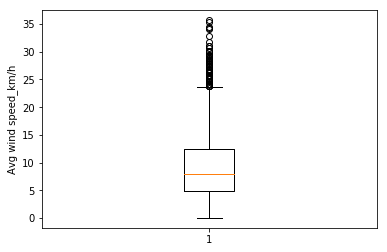

In [24]:
x = df2['Avg wind speed_km/h']
plt.boxplot(x)

# Label axis
plt.ylabel('Avg wind speed_km/h')

plt.show()

# This box and whisker plot shows that the middle 50% of the wind speed is pretty low around 5 - 13 km/hr.
# The calmer speeds are recorded down to almost zero, while the faster speeds (upper 25%) get up to almost 25 km/hr.
# The outliers might fall in line with storm events, but this would need to be confirmed in another plot, or colored by 
# storm events to confirm.